In [8]:
import numpy as np
import pandas as pd
import re


df = pd.read_csv("csv/twitter_df.csv")

rent_regex = r"(?:[Rr]ent|[Bb]edroom|[Bb]d|[Bb]ed|[Rr]oom\s)\s?[:-]?\s?£?(\d{1,2}?,?\d{3,4})"

energy_regex = r"[Ee]nergy\s?[:-]*(?:\D+\s?)?\s?£?(\d?,?\d+)+"

water_regex = r"[Ww]ater\s?[:-]*\s?£?(\d{1,3})"

tax_regex = r"[Cc]ouncil\s?[Tt]ax\s?[:-]*\s?£?(\d{1,3})"

groceries_regex = r"[Gg]roceries\s?[:-]*\s?£?(\d{1,3})"

clothing_regex = r"[Cc]lothing\s?[:-]*\s?£?(\d{1,3})"

room_regex = r"(\d)\s?(?:[Bb]edroom|[Bb]d|[Bb]ed|[Rr]oom)"

county_regex = r"(?:Aberdeen|Bedford|Birmingham|Bolton|Bristol|Canterbury|Cambridgeshire|Coventry|Dartford|Derby|Dundee|Durham|Essex|Glasgow|Gloucester|Gosport|Ireland|Leeds|Leicester|Lincoln|London|Loughborough|Luton|Manchester|Middlesbrough|Northampton|Oxford|Peterborough|Scotland|Sheffield|Stoke|Sunderland|Surrey|Swanley|Walsall|Westminster|Wolverhampton)\b"

# df = pd.read_parquet("parquet/twitter_df.parquet", engine = "pyarrow")

df["text"] = df["text"].str.replace("\n", " ")

df["county"] = df["text"].apply(lambda x: re.findall(county_regex, x)[0] if re.findall(county_regex, x) else np.nan)

df["rent_cost"] = df["text"].apply(lambda x: re.findall(rent_regex, x)[0] if re.findall(rent_regex, x) else np.nan)

df["no_of_rooms"] = df["text"].apply(lambda x: re.findall(room_regex, x)[0] if re.findall(room_regex, x) else np.nan)

df["energy_bill"] = df["text"].apply(lambda x: re.findall(energy_regex, x)[0] if re.findall(energy_regex, x) else np.nan)

df["council_tax"] = df["text"].apply(lambda x: re.findall(tax_regex, x)[0] if re.findall(tax_regex, x) else np.nan)

df["groceries"] = df["text"].apply(lambda x: re.findall(groceries_regex, x)[0] if re.findall(groceries_regex, x) else np.nan)

df["clothing"] = df["text"].apply(lambda x: re.findall(clothing_regex, x)[0] if re.findall(clothing_regex, x) else np.nan)  

df["water"] = df["text"].apply(lambda x: re.findall(water_regex, x)[0] if re.findall(water_regex, x) else np.nan)

df = df[["username", "county", "no_of_rooms", "rent_cost", "energy_bill", "water", "council_tax", "groceries", "clothing"]]

df.head()

,username,county,no_of_rooms,rent_cost,energy_bill,water,council_tax,groceries,clothing
0,SK 🇬🇧🇬🇧,Birmingham,1,NaN,150,40,110,300,300
1,ONYEDIKACHUKWU ANAMBRA,London,NaN,NaN,500,NaN,NaN,NaN,NaN
2,👑ℂ𝔸𝔹𝕆 EMPIRE,NaN,NaN,1350,170,NaN,225,200,NaN
3,🎙OLUOMO OF DERBY 🇳🇬 🇬🇧,NaN,NaN,NaN,50,NaN,NaN,NaN,NaN
4,Ornicar,NaN,NaN,NaN,114,32,160,315,NaN


In [10]:
df.loc[df["county"].isna(), "county"] = "United Kingdom"

# print(df["rent_cost"].dtype)

df.loc[:, "rent_cost"] = df["rent_cost"].str.replace(",", "")
df.loc[:, "energy_bill"] = df["energy_bill"].str.replace(",", "")

# print(df.dtypes)

df["rent_cost"] = df["rent_cost"].astype("float")
df["energy_bill"] = df["energy_bill"].astype("float")
df["water"] = df["water"].astype("float")
df["council_tax"] = df["council_tax"].astype("float")
df["groceries"] = df["groceries"].astype("float")
df["clothing"] = df["clothing"].astype("float")

# print(df.dtypes)



subset_df = df.copy()


# print(df[dup_first].head(20))

# na_rent = np.random.randint(int(df["rent_cost"].min()), int(df["rent_cost"].max()), df["rent_cost"].isna().sum())

# df.loc[df["rent_cost"].isna(), "rent_cost"] = na_rent


df.head(10)
# print(df.sample(10))
# print((pseudo_energy_bills))



,username,county,no_of_rooms,rent_cost,energy_bill,water,council_tax,groceries,clothing
0,SK 🇬🇧🇬🇧,Birmingham,1,NaN,150.0,40.0,110.0,300.0,300.0
1,ONYEDIKACHUKWU ANAMBRA,London,NaN,NaN,500.0,NaN,NaN,NaN,NaN
2,👑ℂ𝔸𝔹𝕆 EMPIRE,United Kingdom,NaN,1350.0,170.0,NaN,225.0,200.0,NaN
3,🎙OLUOMO OF DERBY 🇳🇬 🇬🇧,United Kingdom,NaN,NaN,50.0,NaN,NaN,NaN,NaN
4,Ornicar,United Kingdom,NaN,NaN,114.0,32.0,160.0,315.0,NaN
5,Carl Jackson,United Kingdom,NaN,NaN,35.0,NaN,35.0,NaN,NaN
6,Ehi Aisagbonhi,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Becklescake 😴,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,‘24.,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Baffled Ape,United Kingdom,NaN,NaN,4.0,NaN,NaN,NaN,NaN


In [11]:
# rent_outliers = subset_df["rent_cost"] > 3000

# energy_outliers = subset_df["energy_bill"] > 1000

# df = subset_df[~rent_outliers]

df = subset_df.copy()

subset = ["rent_cost", "energy_bill"]

# dup_first = df.duplicated(subset = ["username", "rent_cost", "no_of_rooms"], keep = "first")

df = df.drop_duplicates(subset = "username", keep = "first")

df = df.dropna(subset = subset, how = "all")

# print(df.loc[df["energy_bill"] > 500])
# print(df.sample(10))

In [12]:
pseudo_rent = np.round(np.random.normal(df["rent_cost"].mean(), 200, df["rent_cost"].isnull().sum()), -2)

pseudo_energy = np.round(np.random.normal(df["energy_bill"].mean(), 50, df["energy_bill"].isnull().sum()), -1)

pseudo_water = np.round(np.random.normal(df["water"].mean(), 5, df["water"].isnull().sum()), -1)

pseudo_tax = np.round(np.random.normal(df["council_tax"].mean(), 10, df["council_tax"].isnull().sum()), -1)

pseudo_groceries = np.round(np.random.normal(df["groceries"].mean(), 2, df["groceries"].isnull().sum()), -1)

pseudo_clothing = np.round(np.random.normal(df["clothing"].mean(), 10, df["clothing"].isnull().sum()), -1)



df.loc[df["rent_cost"].isna(), "rent_cost"] = pseudo_rent

df.loc[df["energy_bill"].isna(), "energy_bill"] = pseudo_energy

df.loc[df["water"].isna(), "water"] = pseudo_water

df.loc[df["council_tax"].isna(), "council_tax"] = pseudo_tax

df.loc[df["groceries"].isna(), "groceries"] = pseudo_groceries

df.loc[df["clothing"].isna(), "clothing"] = pseudo_clothing



rent_range = [0, 600, 1000, np.inf]

room_map = ["1", "2", "3"]

df.loc[df["no_of_rooms"].isna(), "no_of_rooms"] = pd.cut(df["rent_cost"], bins = rent_range, labels = room_map)

df.loc[:, "no_of_rooms"] = df["no_of_rooms"].astype("category")


# print(df["clothing"].min())

# print(df.head(10))
# print(df.sample(10))

In [13]:
df["no_of_rooms"] = df["no_of_rooms"].astype("category")
df["rent_cost"] = df["rent_cost"].astype("float")
df["energy_bill"] = df["energy_bill"].astype("float")
df["water"] = df["water"].astype("float")
df["council_tax"] = df["council_tax"].astype("float")
df["groceries"] = df["groceries"].astype("float")
df["clothing"] = df["clothing"].astype("float")

# print(df[df["no_of_rooms"] == ""])


# print(df.info())
# print(df.describe(include = "all"))
# print(df["no_of_rooms"].unique())
# print(df[df["username"] == "SK 🇬🇧🇬🇧"])
df.sample(10)

,username,county,no_of_rooms,rent_cost,energy_bill,water,council_tax,groceries,clothing
988,Engreb,Derby,3,4300.0,0.0,50.0,140.0,250.0,100.0
851,Olohunlomerue Yussuff Adebayo 🐕🌖,Bolton,2,4300.0,150.0,30.0,125.0,200.0,70.0
26,Opeyemi Feyisike 🧣🧣,United Kingdom,3,4600.0,500.0,60.0,130.0,200.0,110.0
391,FrankLeeBrian,Westminster,3,4300.0,0.0,50.0,120.0,200.0,110.0
635,Tonight,United Kingdom,3,4300.0,8.0,60.0,130.0,200.0,140.0
114,Mr Timmy,Scotland,2,1100.0,126.0,50.0,209.0,250.0,120.0
952,Akorede 💫,Sheffield,3,4200.0,80.0,50.0,130.0,120.0,120.0
87,ayotolaoluwaseyi,Ireland,2,4100.0,50.0,50.0,150.0,200.0,130.0
106,Oluwadamilola ❤️❤️,Manchester,1,4200.0,86.0,38.0,83.0,400.0,200.0
139,Wambui Murindo,United Kingdom,3,6500.0,180.0,50.0,140.0,200.0,130.0


In [29]:
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [31]:
df.head()

,username,county,no_of_rooms,rent_cost,energy_bill,water,council_tax,groceries,clothing
0,SK 🇬🇧🇬🇧,Birmingham,1,4200.0,150.0,40.0,110.0,300.0,300.0
1,ONYEDIKACHUKWU ANAMBRA,London,3,4300.0,500.0,50.0,120.0,210.0,120.0
2,👑ℂ𝔸𝔹𝕆 EMPIRE,United Kingdom,3,1350.0,170.0,60.0,225.0,200.0,120.0
3,🎙OLUOMO OF DERBY 🇳🇬 🇬🇧,United Kingdom,3,4400.0,50.0,50.0,130.0,200.0,120.0
4,Ornicar,United Kingdom,3,4300.0,114.0,32.0,160.0,315.0,130.0


In [30]:
emoji_regex = r"/[a-zA-Z0-9 ]/g"

df1 = df.copy()

df1["username"] = df1["username"].apply(remove_emojis)

df1.head()

,username,county,no_of_rooms,rent_cost,energy_bill,water,council_tax,groceries,clothing
0,SK,Birmingham,1,4200.0,150.0,40.0,110.0,300.0,300.0
1,ONYEDIKACHUKWU ANAMBRA,London,3,4300.0,500.0,50.0,120.0,210.0,120.0
2,ℂ EMPIRE,United Kingdom,3,1350.0,170.0,60.0,225.0,200.0,120.0
3,OLUOMO OF DERBY,United Kingdom,3,4400.0,50.0,50.0,130.0,200.0,120.0
4,Ornicar,United Kingdom,3,4300.0,114.0,32.0,160.0,315.0,130.0


In [44]:
clean_df = df[["county", "no_of_rooms", "rent_cost", "energy_bill", "water", "council_tax", "groceries", "clothing"]]

clean_df = clean_df.reset_index()

clean_df.head()

,index,county,no_of_rooms,rent_cost,energy_bill,water,council_tax,groceries,clothing
0,0,Birmingham,1,4200.0,150.0,40.0,110.0,300.0,300.0
1,1,London,3,4300.0,500.0,50.0,120.0,210.0,120.0
2,2,United Kingdom,3,1350.0,170.0,60.0,225.0,200.0,120.0
3,3,United Kingdom,3,4400.0,50.0,50.0,130.0,200.0,120.0
4,4,United Kingdom,3,4300.0,114.0,32.0,160.0,315.0,130.0


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

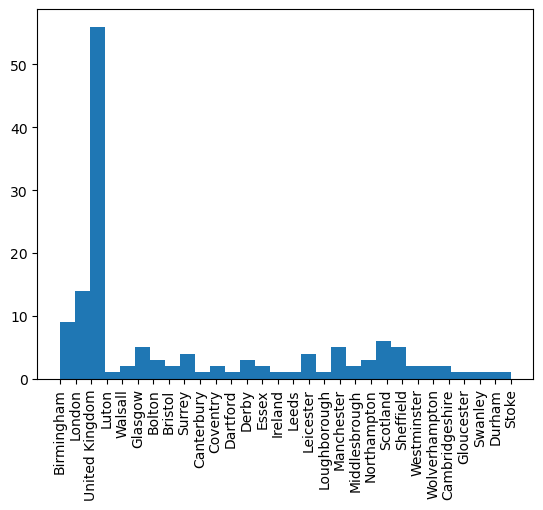

In [56]:
plt.hist(clean_df.county, bins = 30)

plt.xticks(rotation = 90)

plt.show()

In [85]:
df_range = clean_df.query("rent_cost < 2000 and rent_cost > 0")

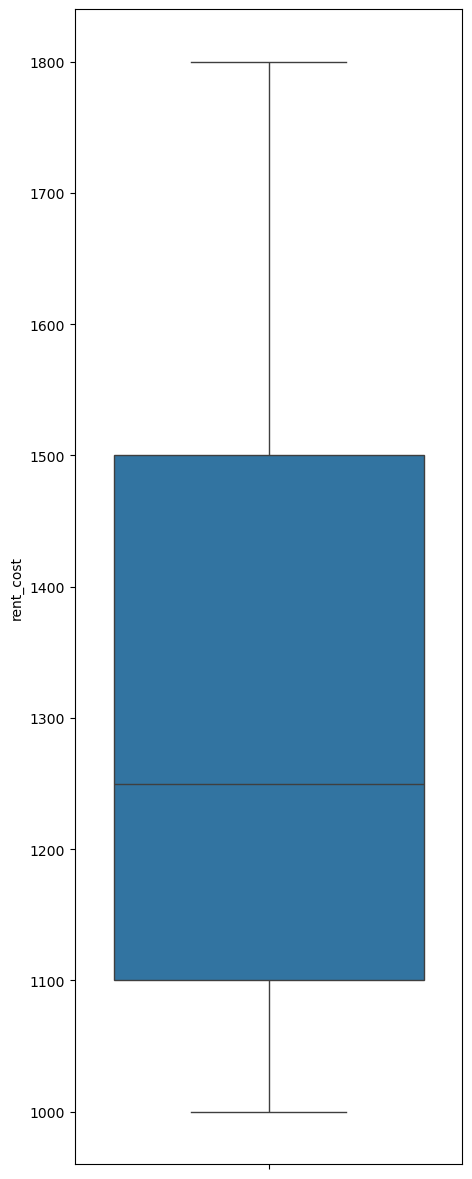

In [79]:
plt.figure(dpi = 100, figsize = (5, 15))
sns.boxplot(df_range.rent_cost)
plt.show()